In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
NMDS_df = pd.read_csv('data/NMDS_coordinates.csv')
NMDS_df

,Unnamed: 0,NMDS1,NMDS2,date,PERIOD,SEASON,SITE,ID,TRANSECT,PatMin,...,mean_rug,sd_rug,se_rug,DIST,X_dist,date_diff,days,Vel,X_Vel,MidPt
0,1,0.487979,0.561653,1981-04-25,2,SPRING,WestEnd Urchin,2_10L,10L,52,...,12.033333,1.245565,0.719128,0.080933,-0.031394,241,241,0.000336,-0.000130,0.503676
1,2,-0.123113,0.445854,1981-10-24,3,FALL,WestEnd Urchin,2_10L,10L,92,...,12.033333,1.245565,0.719128,0.621967,-0.611092,182,182,0.003417,-0.003358,0.182433
2,3,-0.325611,0.149516,1982-04-29,4,SPRING,WestEnd Urchin,2_10L,10L,51,...,12.033333,1.245565,0.719128,0.358918,-0.202498,187,187,0.001919,-0.001083,-0.224362
3,4,-0.227368,0.218172,1982-10-18,5,FALL,WestEnd Urchin,2_10L,10L,13,...,12.033333,1.245565,0.719128,0.119855,0.098243,172,172,0.000697,0.000571,-0.276490
4,5,-0.207992,0.233975,1983-05-01,6,SPRING,WestEnd Urchin,2_10L,10L,4,...,12.033333,1.245565,0.719128,0.025004,0.019376,195,195,0.000128,0.000099,-0.217680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1938,1939,-0.652330,-0.199087,2016-05-01,72,SPRING,East Dutch,5_45R,45R,0,...,10.823576,1.297844,0.749311,0.212317,-0.205877,193,193,0.001100,-0.001067,-0.549392
1939,1940,-0.515651,-0.040207,2016-09-27,73,FALL,East Dutch,5_45R,45R,3,...,10.823576,1.297844,0.749311,0.209581,0.136679,149,149,0.001407,0.000917,-0.583991
1940,1941,-0.460146,-0.100564,2017-04-04,74,SPRING,East Dutch,5_45R,45R,0,...,10.823576,1.297844,0.749311,0.081999,0.055505,189,189,0.000434,0.000294,-0.487899
1941,1942,-0.259065,-0.162319,2017-10-12,75,FALL,East Dutch,5_45R,45R,0,...,10.823576,1.297844,0.749311,0.210351,0.201082,191,191,0.001101,0.001053,-0.359606


In [2]:
NMDS_df['SITE']

0       WestEnd Urchin
1       WestEnd Urchin
2       WestEnd Urchin
3       WestEnd Urchin
4       WestEnd Urchin
             ...      
1938        East Dutch
1939        East Dutch
1940        East Dutch
1941        East Dutch
1942        East Dutch
Name: SITE, Length: 1943, dtype: object

### Python高级作图(Pyecharts库)

In [3]:
from collections import defaultdict
site_dict = defaultdict(int)
for item in list(NMDS_df['SITE']):
    site_dict[item] += 1

In [4]:
from pyecharts.globals import CurrentConfig
CurrentConfig.ONLINE_HOST = "https://assets.pyecharts.org/assets/"
import pyecharts
from pyecharts.charts import Pie
from pyecharts import options as opts # 载入配置项
from pyecharts.globals import CurrentConfig
result = []
for item in site_dict:
    result.append((item, site_dict[item]))

pie = (
    Pie(init_opts=opts.InitOpts(width="800px", height="400px"))
    .add(series_name="", 
         data_pair=result, 
         radius=["10%","60%"], # 控制内外半径，百分比形式，相对于容器高宽中较小的那一项的一半
        )
    .set_colors(["blue", "green", "yellow", "red", "pink", "orange", "purple"]) # 设置颜色
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}")) # 全局配置项 - 标签
    # 模板变量有 {a}, {b}，{c} 分别表示系列名，数据名，数据值等。 
)
pie.load_javascript()

In [5]:
pie.render()

'/Users/creative/Python/statistc-final-work/render.html'

<img src="resource/pyecharts.png" width = "800"  alt="pyecharts图片" 
align=center>

### Python高级作图(Seaborn库)

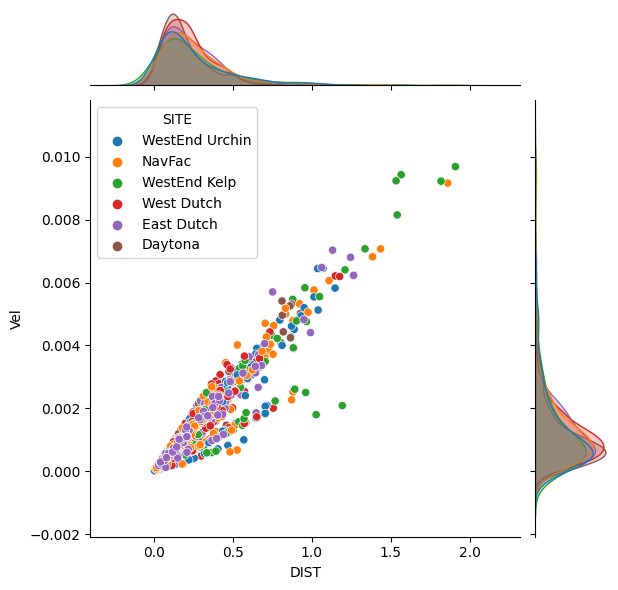

In [6]:
sns.jointplot(x="DIST", y="Vel", data=NMDS_df,hue = 'SITE')

### Python Scikit-learn库10—支持向量机(分类、回归和异常检测、核函数)

In [7]:
## 14、Python Scikit-learn库10—支持向量机(分类、回归和异常检测、核函数)
from collections import defaultdict
nlist = ["PatMin","MegUnd","DerImb","PisGig","PycHel","SteOsm","LamSpp","MacJuv","LamJuv","EisArb","PteCal","MacPyr","mean_rug","sd_rug","se_rug","X_dist","date_diff","days","Vel","X_Vel","MidPt","DIST"]
nlist_dict = defaultdict(list)

for item in nlist:
    col_max = max(list(NMDS_df[item]))
    NMDS_df[item] = NMDS_df[item].apply(lambda x: x/col_max)
NMDS_SITE_X = []
NMDS_SITE_Y = []
for i in range(len(NMDS_df)):
    data = NMDS_df.iloc[i]

    temp = []
    for item in nlist:
        temp.append(float(data[item]))
    nlist_dict[data['SITE']].append(temp)

In [8]:
X_data = []
y_data = []
num = 0
for item in nlist_dict:
    for subitem in nlist_dict[item]:
        X_data.append(subitem)
        y_data.append(num)
    num += 1

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.1, random_state=42)

In [10]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf').fit(X_train, y_train)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import cohen_kappa_score,hamming_loss,jaccard_score,hinge_loss
kappa = cohen_kappa_score(y_pred,y_test) 
ham_distance = hamming_loss(y_pred,y_test)
print(f'kappa:{kappa},ham_distance:{ham_distance}')

kappa:0.7456656592969619,ham_distance:0.21025641025641026


### Python Scikit-learn库7— Logistic回归、广义线性回归

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf=LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import cohen_kappa_score,hamming_loss,jaccard_score,hinge_loss
kappa = cohen_kappa_score(y_pred,y_test) 
ham_distance = hamming_loss(y_pred,y_test)
print(f'kappa:{kappa},ham_distance:{ham_distance}')

kappa:0.5715923201833986,ham_distance:0.35384615384615387


### Python Scikit-learn库11—随机梯度下降(分类、 回归)

In [17]:
from sklearn.linear_model import SGDClassifier
import numpy as np
sgd_clf = SGDClassifier(max_iter=100000, tol=1e-6, random_state=42)  # 前两个是新版默认参数
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=100000, random_state=42, tol=1e-06)

In [18]:
y_pred = sgd_clf.predict(X_test)

In [19]:
from sklearn.metrics import cohen_kappa_score,hamming_loss,jaccard_score,hinge_loss
kappa = cohen_kappa_score(y_pred,y_test) 
ham_distance = hamming_loss(y_pred,y_test)
print(f'kappa:{kappa},ham_distance:{ham_distance}')

kappa:0.5635383499889663,ham_distance:0.3641025641025641


### Python的XGBoost库(GradientBoosting的优化版)

In [42]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [43]:
model = xgb.XGBRegressor(max_depth=6, objective='reg:squarederror')
param_grid = {
 'n_estimators': range(1, 51, 1),
 'learning_rate':np.arange(0,1,0.1)
}
clf = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error",cv=5)
clf.fit(X_train,y_train)
clf.best_score_

-0.005628018693781524

In [44]:
dtrain_r = xgb.DMatrix(X_train,y_train) #分别传入特征矩阵和标签

In [45]:
param = {"subsample":1
          ,"max_depth":6
          ,"eta":0.5
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1}
num_round = 200

用时： 00:01:164234


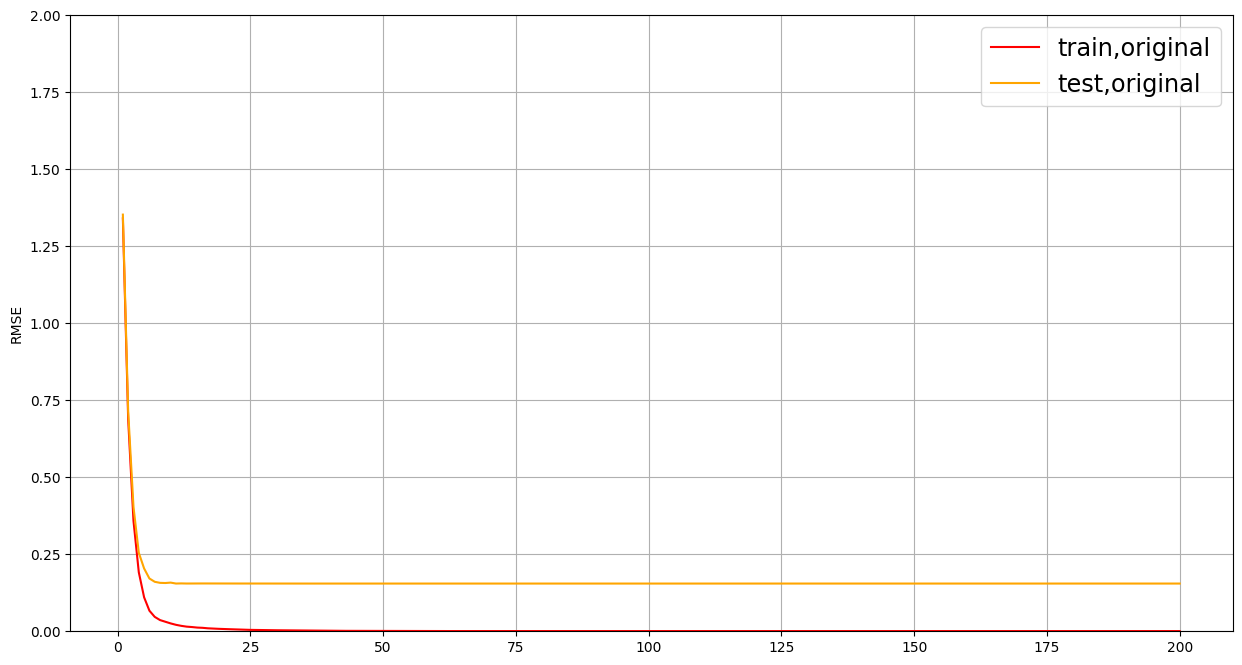

In [48]:
import datetime
from time import time

time0 = time()
cvresult1 = xgb.cv(param, dtrain_r, num_round)
print("用时：", datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=2)
ax.set_ylabel("RMSE")
ax.grid()
ax.plot(range(1,num_round+1),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,num_round+1),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

### Python Scikit-learn库12 —最近邻(分类、回归) NearestNeighbors, KDTree, BallTree, NearestCentroid, KNeighborsClassifier

In [49]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(30)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [50]:
y_pred = clf.predict(X_test)

In [51]:
from sklearn.metrics import cohen_kappa_score,hamming_loss,jaccard_score,hinge_loss
kappa = cohen_kappa_score(y_pred,y_test) 
ham_distance = hamming_loss(y_pred,y_test)
print(f'kappa:{kappa},ham_distance:{ham_distance}')

kappa:0.674718506399769,ham_distance:0.26666666666666666


### Python Scikit-learn库14—偏最小二乘法(PLS)和 典型相关分析(CCA)

In [52]:
from sklearn.cross_decomposition import PLSRegression
plsda = PLSRegression(n_components=8)
y_class = pd.get_dummies(y_train)
plsda.fit(X_train, y_class)

PLSRegression(n_components=8)

In [53]:
y_pred = plsda.predict(X_test)
y_hat = np.array([np.argmax(i) for i in y_pred])

In [54]:
from sklearn.metrics import cohen_kappa_score,hamming_loss,jaccard_score,hinge_loss
kappa = cohen_kappa_score(y_hat,y_test) 
ham_distance = hamming_loss(y_hat,y_test)
print(f'kappa:{kappa},ham_distance:{ham_distance}')

kappa:0.5273481103492266,ham_distance:0.38974358974358975


### Python Scikit-learn库15 —决策树(分类、回归) ID3、C4.5、C5.0和CART

In [55]:
n_NMDS_df = NMDS_df.sample(frac=0.9)
o_NMDS_df = NMDS_df.loc[~NMDS_df.index.isin(n_NMDS_df.index)]

In [56]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(n_NMDS_df[nlist], n_NMDS_df['SITE'])

In [57]:
import graphviz 
def plot_tree(clf, feature_names, target_names):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph

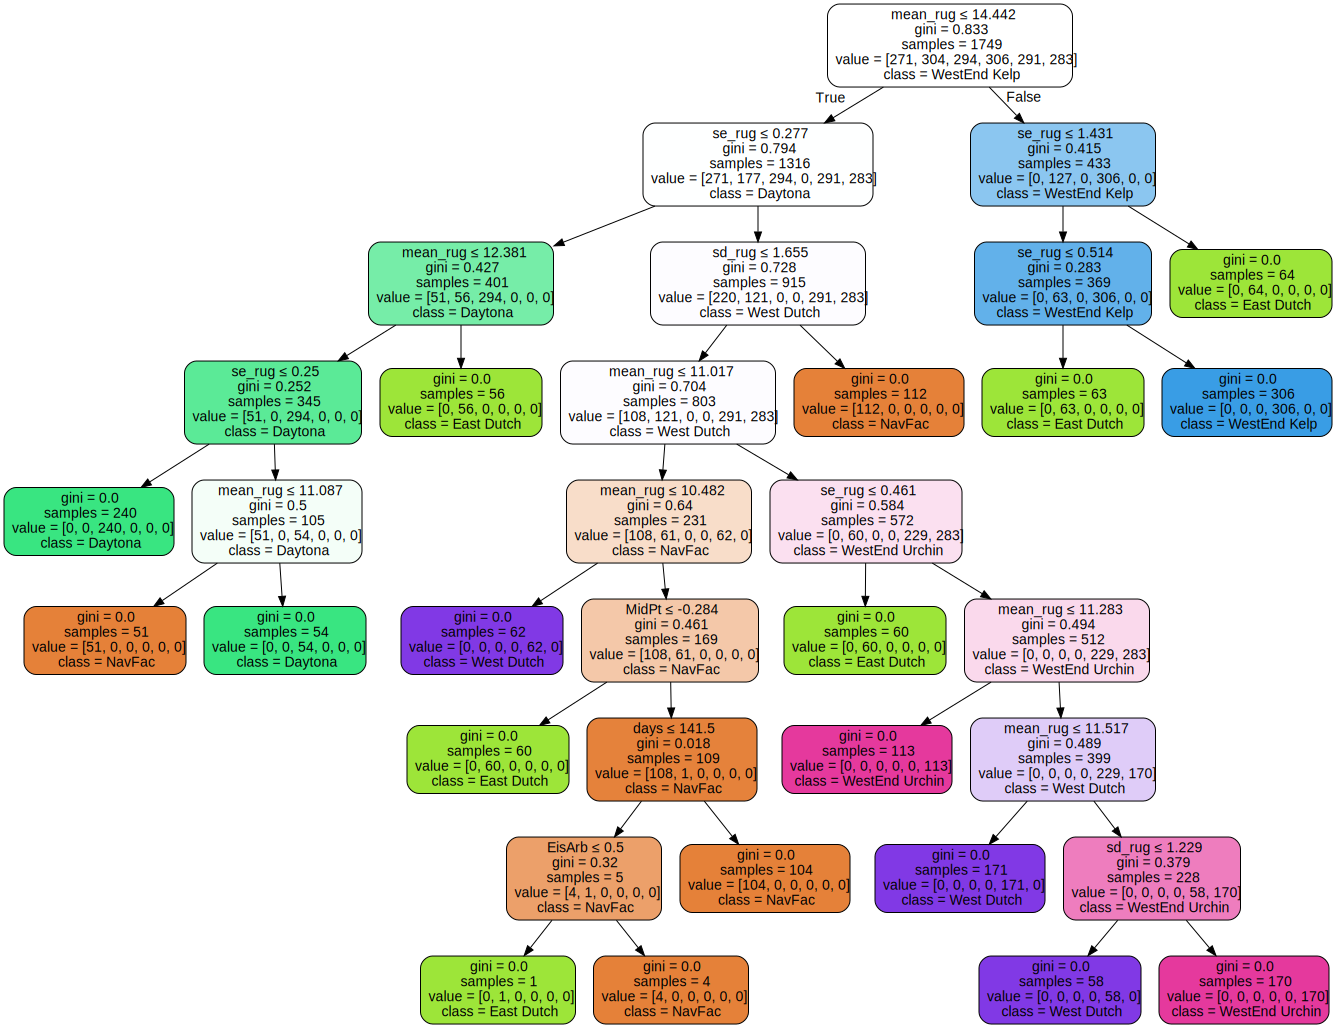

In [58]:
plot_tree(clf, nlist, list(set(NMDS_df['SITE'])))

In [59]:
y_pred = clf.predict(o_NMDS_df[nlist])

In [60]:
y_test = list(o_NMDS_df['SITE'])

In [61]:
clf.score(n_NMDS_df[nlist], n_NMDS_df['SITE'])

1.0

### Python Scikit-learn库16—集成算法(bagging 、 随 机森林、极端随机树、AdaBoost 、梯度提升树GBDT ) (分类、回归)

In [79]:
n_NMDS_df = NMDS_df.sample(frac=0.9)
o_NMDS_df = NMDS_df.loc[~NMDS_df.index.isin(n_NMDS_df.index)]
NMDS_site =set(NMDS_df['SITE'])
NMDS_site_dict = {}
for item in NMDS_site:
    if item not in NMDS_site_dict:
        NMDS_site_dict[item] = len(NMDS_site_dict)

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
gbdt = GradientBoostingRegressor(
  loss = 'squared_error'
, learning_rate = 0.1
, n_estimators = 100
, subsample = 1
, min_samples_split = 2
, min_samples_leaf = 1
, max_depth = 3
, init = None
, random_state = None
, max_features = None
, alpha = 0.9
, verbose = 0
, max_leaf_nodes = None
, warm_start = False
)
n_NMDS_df['SITE'] = n_NMDS_df['SITE'].apply(lambda x: NMDS_site_dict[x])
o_NMDS_df['SITE'] = o_NMDS_df['SITE'].apply(lambda x: NMDS_site_dict[x])
gbdt.fit(n_NMDS_df[nlist], n_NMDS_df['SITE'])
pred = gbdt.predict(o_NMDS_df[nlist])
total_err = 0
y_test = list(o_NMDS_df['SITE'])
for i in range(pred.shape[0]):
    print('pred:', int(pred[i]), ' label:', y_test[i])
print('均方误差:', np.sqrt(((pred - y_test) ** 2).mean()))

/var/folders/rp/hm8s3jw15879dx4wp_lgk0lr0000gn/T/ipykernel_8477/1637941541.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_NMDS_df['SITE'] = o_NMDS_df['SITE'].apply(lambda x: NMDS_site_dict[x])


pred: 4  label: 5
pred: 4  label: 5
pred: 4  label: 5
pred: 4  label: 5
pred: 4  label: 5
pred: 4  label: 5
pred: 0  label: 0
pred: 0  label: 0
pred: 0  label: 0
pred: 0  label: 0
pred: 0  label: 0
pred: 0  label: 0
pred: 0  label: 0
pred: 0  label: 0
pred: 0  label: 0
pred: 3  label: 3
pred: 3  label: 3
pred: 3  label: 3
pred: 3  label: 3
pred: 3  label: 4
pred: 4  label: 4
pred: 3  label: 4
pred: 3  label: 4
pred: 4  label: 4
pred: 3  label: 4
pred: 4  label: 4
pred: 4  label: 4
pred: 0  label: 1
pred: 0  label: 1
pred: 0  label: 1
pred: 0  label: 1
pred: 0  label: 1
pred: 0  label: 1
pred: 0  label: 1
pred: 0  label: 1
pred: 0  label: 1
pred: 1  label: 2
pred: 1  label: 2
pred: 1  label: 2
pred: 1  label: 2
pred: 1  label: 2
pred: 1  label: 2
pred: 2  label: 2
pred: 5  label: 5
pred: 4  label: 5
pred: 4  label: 5
pred: 4  label: 5
pred: 4  label: 5
pred: 4  label: 5
pred: 4  label: 5
pred: 4  label: 5
pred: 4  label: 5
pred: 4  label: 5
pred: 3  label: 4
pred: 3  label: 4
pred: 3  l

In [81]:
y_pred = []
for i in range(len(pred)):
    y_pred.append(int(pred[i]))

In [82]:
from sklearn.metrics import cohen_kappa_score,hamming_loss,jaccard_score,hinge_loss
kappa = cohen_kappa_score(y_pred,y_test) 
ham_distance = hamming_loss(y_pred,y_test)
print(f'kappa:{kappa},ham_distance:{ham_distance}')

kappa:0.4419764134360318,ham_distance:0.4639175257731959


### Python Scikit-learn库17—聚类(K-means, KMedians, K-medoids,谱聚类, 层次聚类, DBSCAN, 高 斯混合模型GMM) 最小二乘等)

In [83]:
X_train = np.array(X_train)
y_train = np.array(y_train)

n_sites: 6, 	 n_samples 1748, 	 n_features 22
______________________________________________________________
init		time	inertia	homo	compl	v-meas
k-means++	0.12s	494	0.244	0.257	0.250
random   	0.06s	494	0.243	0.255	0.249


/Users/creative/opt/anaconda3/envs/statistic-homework/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


PCA-based	0.01s	494	0.183	0.198	0.190
______________________________________________________________


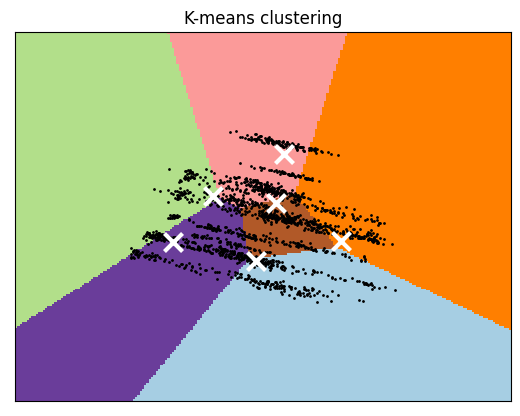

In [84]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


n_samples, n_features = X_train.shape

sample_size = 300

print("n_sites: %d, \t n_samples %d, \t n_features %d"
      % (6, n_samples, n_features))


print(62 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas')

# 聚类效果评价：1、homogeneity_score:每一个聚出的类仅包含一个类别的程度度量，类似于准确率。
# 2、completeness:每一个类别被指向相同聚出的类的程度度量，类似于召回率
# 3、v_measure_score:1与2的折衷，两者的调和平均数（倒数平均数），类似于F1 Score
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(y_train, estimator.labels_),
             metrics.completeness_score(y_train, estimator.labels_),
             metrics.v_measure_score(y_train, estimator.labels_)))

bench_k_means(KMeans(init='k-means++', n_clusters=6, n_init=10),
              name="k-means++", data=X_train)

bench_k_means(KMeans(init='random', n_clusters=6, n_init=10),
              name="random", data=X_train)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=6).fit(X_train)
bench_k_means(KMeans(init=pca.components_, n_clusters=6, n_init=10),
              name="PCA-based",
              data=X_train)
print(62 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(X_train)
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))# 绘制网格图

# Obtain labels for each point in mesh. Use last trained model.
# 对于网格里的每个点进行聚类（分类）
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])# ravel把矩阵平铺成一维向量,c_按行左右连接，r_按列上下连接

# Put the result into a color plot
# Z为一个只包含0-9的向量
Z = Z.reshape(xx.shape)
plt.figure(1)# 指定图像编号
plt.clf()# clear figure
# 绘制背景颜色
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto')

# 绘制黑点
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
# 绘制中心点
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=6)
plt.title('K-means clustering')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Python Scikit-learn库2—Lasso、 MultiTaskLasso(多任务Lasso)

In [44]:
nlist = ["PatMin","MegUnd","DerImb","PisGig","PycHel","SteOsm","LamSpp","MacJuv","LamJuv","EisArb","PteCal","MacPyr","mean_rug","sd_rug","se_rug","X_dist","date_diff","days","Vel","X_Vel","MidPt"]
for item in nlist:
    col_max = max(list(NMDS_df[item]))
    NMDS_df[item] = NMDS_df[item].apply(lambda x: x/col_max)
NMDS_SITE_X = []
NMDS_SITE_Y = []
for i in range(len(NMDS_df)):
    data = NMDS_df.iloc[i]
    if data['SITE'] == 'East Dutch':
        temp = []
        for item in nlist:
            temp.append(float(data[item]))
        NMDS_SITE_X.append(temp)
        NMDS_SITE_Y.append(data["DIST"])

In [45]:
NMDS_SITE_X = np.array(NMDS_SITE_X)
NMDS_SITE_Y = np.array(NMDS_SITE_Y).reshape(-1,1)

In [46]:
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
lasso_coef = Lasso(alpha=0.01).fit(NMDS_SITE_X, NMDS_SITE_Y).coef_

In [47]:
for i in range(len(nlist)):
    print(f'{nlist[i]}:{lasso_coef[i]}')

PatMin:-0.0
MegUnd:0.0
DerImb:0.0
PisGig:-0.0
PycHel:-0.0
SteOsm:0.0
LamSpp:0.0
MacJuv:0.0
LamJuv:0.0
EisArb:0.0
PteCal:0.0
MacPyr:0.0
mean_rug:-0.0
sd_rug:-0.0
se_rug:-0.0
X_dist:-0.0
date_diff:0.0
days:0.0
Vel:0.041462483539836045
X_Vel:-0.0
MidPt:-0.0


### Python Scikit-learn库3—弹性网络ElasticNet 、 MultiTaskElasticNet (多任务弹性网络)

In [48]:
from sklearn.linear_model import ElasticNetCV
enetcv = ElasticNetCV()
params = {"l1_ratio":0.5, "eps":1e-5, "n_alphas":10, "alphas":None, "fit_intercept":True, "precompute":False, \
         "max_iter":1000, "tol":1e-4, "cv":5, "copy_X":True, "verbose":0, "n_jobs":None, "positive":False, "random_state":False, \
         "selection":"cyclic"}
enetcv.set_params(**params)

ElasticNetCV(cv=5, eps=1e-05, n_alphas=10, precompute=False, random_state=False)

In [49]:
model = enetcv.fit(NMDS_SITE_X, NMDS_SITE_Y.ravel(), sample_weight=None)

In [50]:
print("sklearn.linear_model.ElasticNetCV类的属性有:", \
      "\nalpha_:\n",model.alpha_, \
      "\nintercept_:\n",model.intercept_, \
      "\nl1_ratio_:\n",model.l1_ratio_, \
      "\nmse_path_:\n",model.mse_path_, \
      "\nalphas_:\n",model.alphas_, \
      "\ncoef_:\n",model.coef_, \
      "\nn_iter_:\n",model.n_iter_, \
      "\ndual_gap_:\n",model.dual_gap_, \
      "\nn_features_in_:\n",model.n_features_in_, \
     )

sklearn.linear_model.ElasticNetCV类的属性有: 
alpha_:
 0.00012573624652933933 
intercept_:
 -0.04428613724990457 
l1_ratio_:
 0.5 
mse_path_:
 [[0.00692609 0.00414102 0.00527748 0.00620931 0.02835151]
 [0.002313   0.00127284 0.00145661 0.00159313 0.01319535]
 [0.0010824  0.00060175 0.00047796 0.00051104 0.00232699]
 [0.00072959 0.00043252 0.00029657 0.00031886 0.00098255]
 [0.0006802  0.00042252 0.00029202 0.00029937 0.00099271]
 [0.00074015 0.00043825 0.00031047 0.00042183 0.00099588]
 [0.00077705 0.00044668 0.00030671 0.00057344 0.0010473 ]
 [0.00079052 0.00045851 0.00030674 0.00063088 0.00107758]
 [0.00079447 0.00046255 0.00030686 0.00064797 0.0010893 ]
 [0.00079559 0.00046373 0.00030691 0.00065282 0.00109283]] 
alphas_:
 [2.09740700e-02 5.83615958e-03 1.62394607e-03 4.51872641e-04
 1.25736247e-04 3.49868575e-05 9.73530093e-06 2.70890531e-06
 7.53768995e-07 2.09740700e-07] 
coef_:
 [-0.00000000e+00  0.00000000e+00 -9.24851189e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.000000

In [51]:
for i in range(len(nlist)):
    print(f'{nlist[i]}:{model.coef_[i]}')

PatMin:-0.0
MegUnd:0.0
DerImb:-0.00924851188688369
PisGig:0.0
PycHel:0.0
SteOsm:0.0
LamSpp:-0.0
MacJuv:0.01201016148844581
LamJuv:0.04282654975025193
EisArb:-0.006419553343178538
PteCal:-0.013270015483852093
MacPyr:-0.0
mean_rug:-0.0
sd_rug:-0.002675061151069189
se_rug:-0.00032089434655666114
X_dist:-0.0
date_diff:0.10896653698450141
days:0.09625325850901247
Vel:0.9132481901517199
X_Vel:0.0006789043008156008
MidPt:2.063713881993624e-05


### Python Scikit-learn库5—贝叶斯回归(贝叶斯岭回归、自动关联判定-ARD)

In [20]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import GridSearchCV
nlist = ["Vel"]
for item in nlist:
    col_max = max(list(NMDS_df[item]))
    NMDS_df[item] = NMDS_df[item].apply(lambda x: x/col_max)
NMDS_SITE_X = []
NMDS_SITE_Y = []
for i in range(len(NMDS_df)):
    data = NMDS_df.iloc[i]
    if data['SITE'] == 'East Dutch':
        temp = []
        for item in nlist:
            temp.append(float(data[item]))
        NMDS_SITE_X.append(temp)
        NMDS_SITE_Y.append(data["DIST"])
NMDS_SITE_X = np.array(NMDS_SITE_X)
NMDS_SITE_Y = np.array(NMDS_SITE_Y).reshape(-1,1)
par = PassiveAggressiveRegressor()  # 建立被动感知算法模型

parmeters = {'C':[(i+1)*0.1 for i in range(10)], 'max_iter':[(i+1)*10000 for i in range(10)], 'tol':[10**(-i) for i in range(5)], 
             'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'], 'epsilon':[10**(-i) for i in range(5)]}
par = GridSearchCV(par, parmeters)  # 网格搜索调参
par.fit(NMDS_SITE_X, NMDS_SITE_Y.ravel())
print(par.best_params_)
print(par.best_score_)

{'C': 0.2, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'max_iter': 80000, 'tol': 1}
0.877237584728161


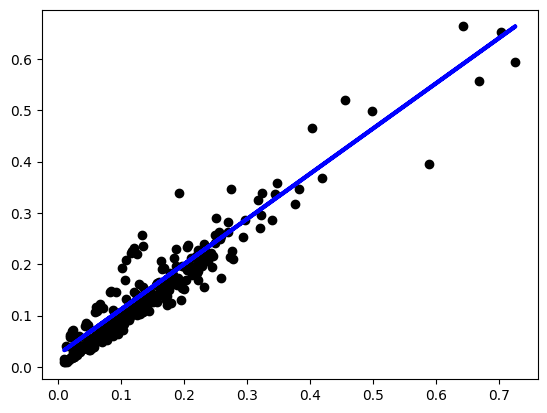

In [21]:
y_pred = par.predict(NMDS_SITE_X)  # 预测测试样本对应target值

fig = plt.figure()  # 训练集图像
plt.scatter(NMDS_SITE_X, NMDS_SITE_Y, color = 'black')
plt.plot(NMDS_SITE_X, y_pred, color = 'blue', linewidth = 3)

### Python统计建模和计量经济学工具包( Statsmodels)

In [24]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
model = sm.OLS(NMDS_SITE_Y,NMDS_SITE_X)
results = model.fit()
results.params
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              8870.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                   1.34e-242
Time:                        22:10:55   Log-Likelihood:                          686.35
No. Observations:                 335   AIC:                                     -1371.
Df Residuals:                     334   BIC:                                     -1367.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9442      0.010     94.181      0.000       0.924       0.964
==============================================================================
Omnibus:                       94.987   Durbin-Watson:                   2.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              677.612
Skew:                           0.966   Prob(JB):                    7.22e-148
Kurtosis:                       9.694   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

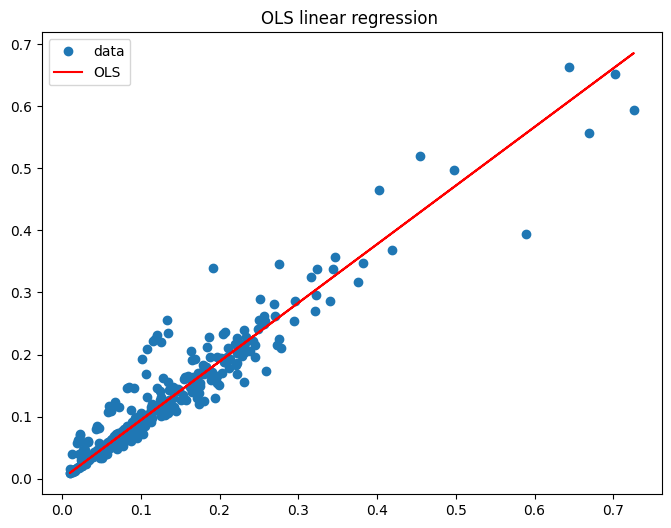

In [28]:
y_fitted = results.fittedvalues
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(NMDS_SITE_X, NMDS_SITE_Y, 'o', label="data")  # 原始数据
ax.plot(NMDS_SITE_X, y_fitted, 'r-', label="OLS")  # 拟合数据
ax.legend(loc='best')  # 显示图例
plt.title('OLS linear regression ')
plt.show()

### Python Scikit-learn库9—鲁棒回归：离群(outliers) 与模型错误、多项式回归

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(NMDS_SITE_X, NMDS_SITE_Y)
line_y = lr.predict(NMDS_SITE_X)

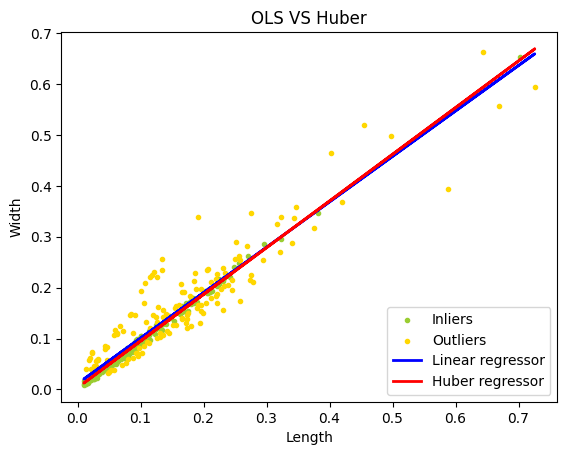

In [55]:
# Huber稳健回归模型
from sklearn.linear_model import HuberRegressor
lw =2
huber = HuberRegressor(alpha=0.0, epsilon=1.35)
huber.fit(NMDS_SITE_X, NMDS_SITE_Y.ravel())

line_y_huber = huber.predict(NMDS_SITE_X) 


outlier_index = huber.outliers_
inlier_index = np.logical_not(huber.outliers_)

plt.scatter(
    NMDS_SITE_X[inlier_index], NMDS_SITE_Y[inlier_index], color="yellowgreen", marker=".", label="Inliers")
plt.scatter(
    NMDS_SITE_X[outlier_index], NMDS_SITE_Y[outlier_index], color="gold", marker=".", label="Outliers")

plt.plot(NMDS_SITE_X, line_y, color="blue", linewidth=lw, label="Linear regressor")
plt.plot(
    NMDS_SITE_X,
    line_y_huber,
    color="red",
    linewidth=lw,
    label="Huber regressor",
)
plt.title("OLS VS Huber")
plt.legend(loc="lower right")
plt.xlabel("Length")
plt.ylabel("Width")
plt.show()

### Python Scikit-learn库8—感知机、被动感知算法

In [70]:
X_all = np.array(X_train+X_test)
y_all = np.array(y_train+y_test)

training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training LogisticRegression


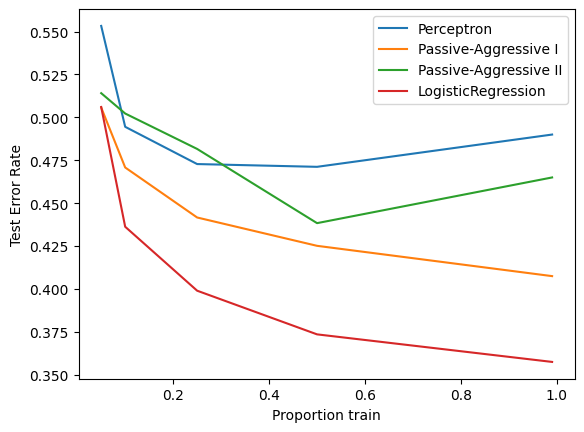

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression


heldout = [0.95, 0.90, 0.75, 0.50, 0.01]  # 设置不同的测试集比例
xx = 1. - np.array(heldout)  # 对应不同的训练集比例
rounds = 20
classifiers = [
    ("Perceptron", Perceptron()),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge', C=1.0, tol=1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge', C=1.0, tol=1e-4)),
    ("LogisticRegression", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X_all.shape[0]))
]

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_tr, X_te, y_tr, y_te = train_test_split(X_all, y_all, test_size=i, random_state=rng)
            clf.fit(X_tr, y_tr)
            y_pred = clf.predict(X_te)
            yy_.append(1 - np.mean(y_pred == y_te))  # 测试集上错误率
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)
plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

### Python: PyTorch库(机器学习)

In [304]:
import torch
from torch.utils.data import Dataset, DataLoader

In [305]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 100
random_seed = 42
num_classes = max(y_test)+1

In [324]:
class DataSetIterater(Dataset):
    def __init__(self, tokens, labels):
        self.tokens = tokens
        self.labels = labels
        
    def __getitem__(self, item):
        return self.tokens[item], self.labels[item]
    
    def __len__(self):
        return len(self.tokens)

In [325]:
train_data = DataSetIterater(X_train, y_train)
test_data = DataSetIterater(X_test, y_test)

In [326]:
def collate_fn(batch_data):
    batch_lens, batch_tokens, batch_labels = [], [], []
    for token, label in batch_data:
        batch_tokens.append(token)
        batch_labels.append(label)
    return batch_tokens, batch_labels

In [327]:
trainset = DataLoader(dataset=train_data, batch_size=batch_size_train, shuffle=False, collate_fn=collate_fn)
testset = DataLoader(dataset=test_data, batch_size=1, shuffle=False, collate_fn=collate_fn)

In [569]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.dense1 = nn.Linear(22,128)
        self.dense2 = nn.Linear(128,64)
        self.fc1 = nn.Linear(64, 16)
        self.fc2 = nn.Linear(16, num_classes)
    def forward(self, x):
        x = F.tanh(self.dense1(x))
        x = F.tanh(self.dense2(x))
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

In [570]:
model = Net().to('cpu')
print(model)

Net(
  (dense1): Linear(in_features=22, out_features=128, bias=True)
  (dense2): Linear(in_features=128, out_features=64, bias=True)
  (fc1): Linear(in_features=64, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=6, bias=True)
)


In [571]:
n_epochs = 500
learning_rate = 0.005
log_interval = 28
random_seed = 1

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [572]:
len(item[0][1])

22

In [573]:
train_losses = []
train_counter = []
test_losses = []
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(trainset): #遍历并得到索引
        # 计算output
        data = torch.tensor(data, dtype=torch.float32)
        target = torch.tensor(target, dtype=torch.long)
        output = model(data)
        # labels = torch.argmax(output, dim=1)
        # 调优
        optimizer.zero_grad()   
        # print(output)
        # print(target)   
        loss = F.nll_loss(output, target) # negative log likelihood loss
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(trainset.dataset),
                       100. * batch_idx / len(trainset), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx * 64) + ((epoch - 1) * len(trainset.dataset)))
            # torch.save(model.state_dict(), './model.pth')
            # torch.save(optimizer.state_dict(), './optimizer.pth')
#train(1)

In [575]:
for epoch in range(1, n_epochs + 1):
    train(epoch)

/Users/creative/opt/anaconda3/envs/statistic-homework/lib/python3.8/site-packages/torch/nn/functional.py:1956: UserWarning:

nn.functional.tanh is deprecated. Use torch.tanh instead.

/var/folders/rp/hm8s3jw15879dx4wp_lgk0lr0000gn/T/ipykernel_72588/431781564.py:17: UserWarning:

Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Train Epoch: 1 [0/1748 (0%)]	Loss: 1.767726
Train Epoch: 2 [0/1748 (0%)]	Loss: 1.776782
Train Epoch: 3 [0/1748 (0%)]	Loss: 1.771052
Train Epoch: 4 [0/1748 (0%)]	Loss: 1.766497
Train Epoch: 5 [0/1748 (0%)]	Loss: 1.766661
Train Epoch: 6 [0/1748 (0%)]	Loss: 1.758086
Train Epoch: 7 [0/1748 (0%)]	Loss: 1.753629
Train Epoch: 8 [0/1748 (0%)]	Loss: 1.752496
Train Epoch: 9 [0/1748 (0%)]	Loss: 1.753588
Train Epoch: 10 [0/1748 (0%)]	Loss: 1.753907
Train Epoch: 11 [0/1748 (0%)]	Loss: 1.752641
Train Epoch: 12 [0/1748 (0%)]	Loss: 1.753107
Train Epoch: 13 [0/1748 (0%)]	Loss: 1.753228
Train Epoch: 14 [0/1748 (0%)]	Loss: 1.751002
Train Epoch: 15 [0/1748 (0%)]	Loss: 1.752491
Train Epoch: 16 [0/1748 (0%)]	Loss: 1.752982
Train Epoch: 17 [0/1748 (0%)]	Loss: 1.752166
Train Epoch: 18 [0/1748 (0%)]	Loss: 1.752023
Train Epoch: 19 [0/1748 (0%)]	Loss: 1.753719
Train Epoch: 20 [0/1748 (0%)]	Loss: 1.753714
Train Epoch: 21 [0/1748 (0%)]	Loss: 1.751317
Train Epoch: 22 [0/1748 (0%)]	Loss: 1.748996
Train Epoch: 23 [0/

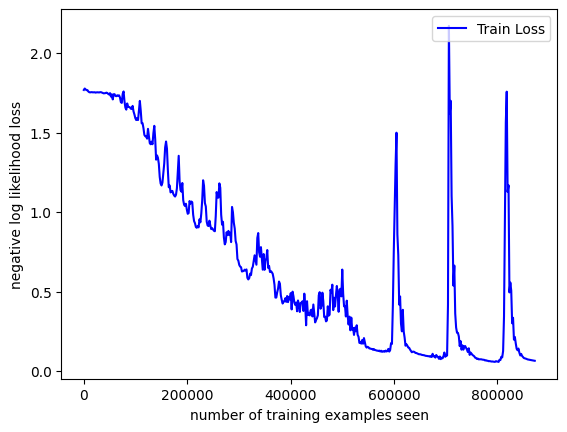

In [577]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

### Python: tensorflow (人工智能学习系统)
### Python关于时间日期的操作

In [579]:
import tensorflow as tf
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime

In [580]:
x_train, x_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.15, random_state=rng)
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

In [581]:
train_db = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

In [585]:
w1 = tf.Variable(tf.random.truncated_normal([22,12],stddev=0.1,seed=666))
b1 = tf.Variable(tf.random.truncated_normal([12],stddev=0.1,seed=666))

In [586]:
lr = 0.2
train_loss_result=[]
test_acc=[]
epoch = 1200
loss_all = 0

In [587]:
#训练神经网络
now_time = datetime.now()
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            y = tf.matmul(x_train, w1) + b1 #matual 为矩阵乘法
            y = tf.nn.softmax(y) #使输出的y符合概率分布
            y_ = tf.one_hot(y_train, depth=12) #转化为独热码格式
            loss = tf.reduce_mean(tf.square(y_ - y))
            loss_all += loss.numpy()
        grads = tape.gradient(loss, [w1, b1])
        
        #参数更新
        w1.assign_sub(lr*grads[0])
        b1.assign_sub(lr*grads[1])

    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_result.append(loss_all / 4)
    loss_all = 0

    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)
        pred = tf.cast(pred, dtype=y_test.dtype)
        correct = tf.cast(tf.equal(pred,y_test), dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
        total_number += x_test.shape[0]
    
    acc = total_correct / total_number
    test_acc.append(acc)
after_time = datetime.now()
print("Time span:", after_time - now_time)

Epoch 0, loss: 0.9901517853140831
Epoch 1, loss: 0.9856994394212961
Epoch 2, loss: 0.981378698721528
Epoch 3, loss: 0.9771875757724047
Epoch 4, loss: 0.9731236882507801
Epoch 5, loss: 0.9691843837499619
Epoch 6, loss: 0.9653668608516455
Epoch 7, loss: 0.9616684000939131
Epoch 8, loss: 0.9580862615257502
Epoch 9, loss: 0.9546178746968508
Epoch 10, loss: 0.9512608293443918
Epoch 11, loss: 0.9480128437280655
Epoch 12, loss: 0.9448717497289181
Epoch 13, loss: 0.9418353885412216
Epoch 14, loss: 0.9389015734195709
Epoch 15, loss: 0.936067957431078
Epoch 16, loss: 0.9333319738507271
Epoch 17, loss: 0.930690735578537
Epoch 18, loss: 0.928141001611948
Epoch 19, loss: 0.925679124891758
Epoch 20, loss: 0.923301100730896
Epoch 21, loss: 0.9210025556385517
Epoch 22, loss: 0.9187788087874651
Epoch 23, loss: 0.916624965146184
Epoch 24, loss: 0.914536003023386
Epoch 25, loss: 0.9125068988651037
Epoch 26, loss: 0.9105326775461435
Epoch 27, loss: 0.9086084887385368
Epoch 28, loss: 0.9067297168076038
Epo

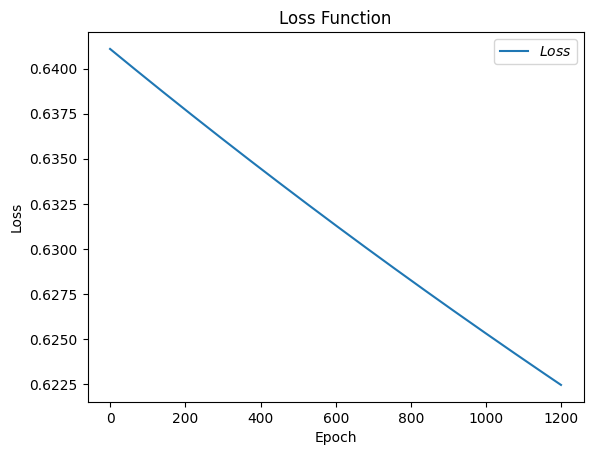

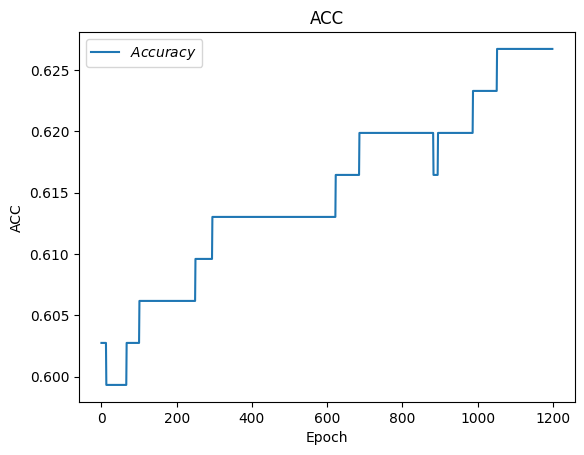

In [144]:
import matplotlib.pylab as plt
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_loss_result, label='$Loss$')
plt.legend()
plt.show()

plt.title('ACC')
plt.xlabel('Epoch')
plt.ylabel('ACC')
plt.plot(test_acc, label='$Accuracy$')
plt.legend()
plt.show()


### Python: keras等(神经网络)

In [591]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [592]:
x_train, x_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.1, random_state=rng)
num_classes = max(y_train)+1

In [593]:
model = keras.Sequential(
    [
        keras.Input(shape= (22, 1)),
        layers.Conv1D(32, kernel_size=3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(64, kernel_size=3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 20, 32)            128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 10, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 8, 64)             6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [594]:
# Train the model
batch_size = 32
epochs = 100
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

history=model.fit(x_train, tf.keras.utils.to_categorical(y_train),
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, tf.keras.utils.to_categorical(y_test))
                 )

Epoch 1/100
55/55 [==============================] - 1s 8ms/step - loss: 1.7751 - accuracy: 0.2077 - val_loss: 1.7676 - val_accuracy: 0.2718
Epoch 2/100
55/55 [==============================] - 0s 3ms/step - loss: 1.7160 - accuracy: 0.3415 - val_loss: 1.6905 - val_accuracy: 0.2923
Epoch 3/100
55/55 [==============================] - 0s 3ms/step - loss: 1.6158 - accuracy: 0.3839 - val_loss: 1.5791 - val_accuracy: 0.3744
Epoch 4/100
55/55 [==============================] - 0s 3ms/step - loss: 1.5187 - accuracy: 0.4027 - val_loss: 1.4802 - val_accuracy: 0.4359
Epoch 5/100
55/55 [==============================] - 0s 3ms/step - loss: 1.4398 - accuracy: 0.4342 - val_loss: 1.4224 - val_accuracy: 0.4974
Epoch 6/100
55/55 [==============================] - 0s 3ms/step - loss: 1.3827 - accuracy: 0.4537 - val_loss: 1.2940 - val_accuracy: 0.4615
Epoch 7/100
55/55 [==============================] - 0s 3ms/step - loss: 1.3123 - accuracy: 0.4754 - val_loss: 1.2476 - val_accuracy: 0.5231
Epoch 8/100
5

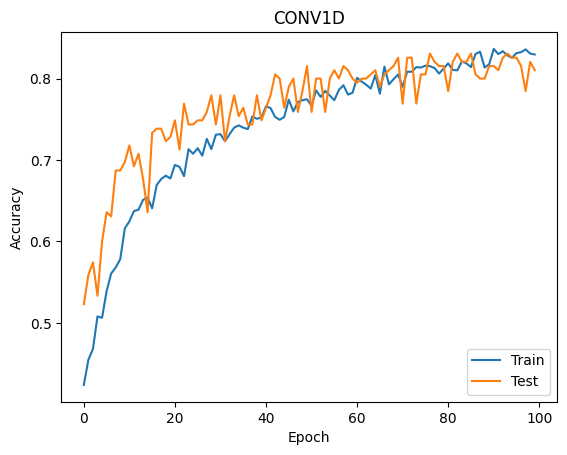

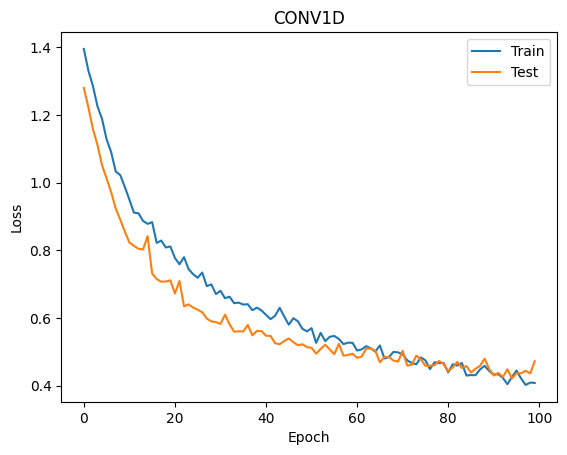

In [160]:
import matplotlib.pyplot as plt
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CONV1D')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CONV1D')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### 预处理(特征提取和归一化): 转换输入数据，以供机器学习算法使用

In [605]:
# Evaluate the trained model
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
y_test_ = enc.fit(y_test.reshape(-1,1))
y_test = enc.transform(y_test.reshape(-1,1)).toarray()
score = model.evaluate(x_test,y_test  , verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6301332712173462
Test accuracy: 0.764102578163147


In [606]:
y_pred_prob = model.predict(x_test,batch_size=32,verbose=1)
n = x_test.shape[0]
y_pred_label = np.zeros(n)
for i in range(n):
    y_pred_label[i] = np.argmax(y_pred_prob[i])
y_pred_label

7/7 [==============================] - 0s 1ms/step


array([3., 5., 1., 5., 5., 5., 0., 1., 0., 1., 4., 3., 0., 4., 1., 4., 0.,
       0., 5., 4., 0., 2., 4., 4., 1., 4., 1., 0., 1., 0., 3., 5., 5., 0.,
       3., 0., 5., 0., 1., 2., 5., 1., 2., 5., 3., 0., 1., 1., 5., 3., 1.,
       0., 2., 4., 0., 0., 0., 2., 1., 0., 4., 4., 2., 4., 4., 4., 0., 3.,
       5., 3., 4., 4., 5., 5., 0., 1., 0., 1., 2., 3., 0., 4., 4., 5., 3.,
       3., 1., 4., 2., 1., 2., 2., 5., 4., 1., 4., 4., 0., 3., 1., 3., 2.,
       1., 1., 0., 1., 0., 0., 1., 5., 0., 4., 0., 2., 2., 0., 4., 0., 0.,
       4., 1., 0., 0., 0., 2., 4., 3., 0., 0., 3., 3., 2., 5., 3., 4., 4.,
       0., 2., 0., 2., 1., 1., 5., 0., 0., 0., 0., 3., 4., 4., 1., 5., 1.,
       4., 1., 3., 3., 3., 3., 0., 5., 3., 0., 0., 1., 1., 4., 5., 5., 1.,
       1., 5., 5., 3., 4., 0., 2., 5., 1., 1., 3., 5., 4., 5., 1., 4., 3.,
       3., 0., 4., 4., 2., 4., 4., 4.])

### Python主成分分析、因子分析、关联规则分析 (apriori) 

In [32]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import eig

In [39]:
nlist = ["PatMin","MegUnd","DerImb","PisGig","PycHel","SteOsm","LamSpp","MacJuv","LamJuv","EisArb","PteCal","MacPyr","mean_rug","sd_rug","se_rug","X_dist","date_diff","days","Vel","X_Vel","MidPt"]
for item in nlist:
    col_max = max(list(NMDS_df[item]))
    NMDS_df[item] = NMDS_df[item].apply(lambda x: x/col_max)
NMDS_SITE_X = []
NMDS_SITE_Y = []
for i in range(len(NMDS_df)):
    data = NMDS_df.iloc[i]
    if data['SITE'] == 'East Dutch':
        temp = []
        for item in nlist:
            temp.append(float(data[item]))
        NMDS_SITE_X.append(temp)
        NMDS_SITE_Y.append(data["DIST"])
X = scale(NMDS_SITE_X)
pcaModel = PCA(n_components = 'mle', copy = True, whiten = False)
pcaModel.fit(X)
var_exp = pcaModel.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
components = pcaModel.components_
singular_values = pcaModel.singular_values_

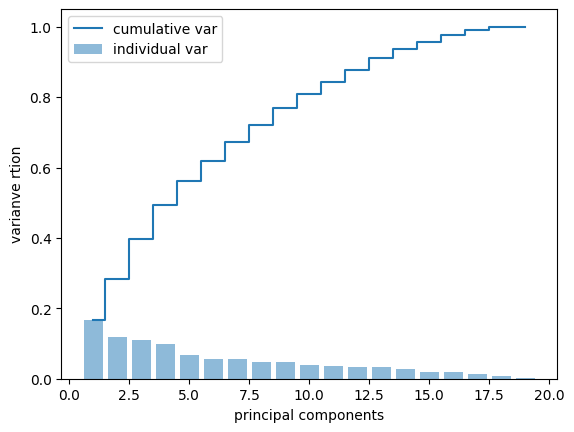

In [40]:
plt.bar(range(1,len(singular_values)+1),var_exp,alpha = 0.5, align = 'center', label = 'individual var')
plt.step(range(1,len(singular_values)+1),cum_var_exp, where = 'mid', label = 'cumulative var')
plt.ylabel('varianve rtion')
plt.xlabel('principal components')
plt.legend(loc = 'best')
plt.show()